In [8]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read the two sheets from the Excel file
file_path = 'Lapsed_Trust Association.xlsx'
sheet1_df = pd.read_excel(file_path, sheet_name='Sheet1')  # First sheet
sheet2_df = pd.read_excel(file_path, sheet_name='Sheet2')  # Second sheet

# Remove rows in sheet1 where 'Individual LookupID' appears in sheet2
sheet1_df = sheet1_df[~sheet1_df['Individual LookupID'].isin(sheet2_df['Individual LookupID'])]

# Remove rows with empty values in the 'Trust Association' column from both sheets
sheet1_df = sheet1_df.dropna(subset=['Trust Association'])
sheet2_df = sheet2_df.dropna(subset=['Trust Association'])

# Print the cleaned datasets for confirmation
print("Sheet1 DataFrame:")
print(sheet1_df)
print("\nSheet2 DataFrame:")
print(sheet2_df)

# If needed, save the cleaned results to a new Excel file
output_file_path = 'Cleaned_Lapsed_Trust_Association.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    sheet1_df.to_excel(writer, sheet_name='Cleaned_Sheet1', index=False)
    sheet2_df.to_excel(writer, sheet_name='Cleaned_Sheet2', index=False)


Sheet1 DataFrame:
       Household ID  Individual LookupID  Age  Age Range Category  \
1          13571649             13570337   54                   4   
6          12554012             12027137   51                   4   
8          12811939             10463576   77                   1   
22         13070266             11535109   54                   4   
23         12603419             11513140   75                   1   
...             ...                  ...  ...                 ...   
52236      12593124             11470208   70                   2   
52239      12979306             10398277   82                   1   
52240      13123632             11365939   72                   2   
52241      13395508             11626948   51                   4   
52243      12516168             11557323   70                   2   

       Trust Association  
1                    0.0  
6                    0.0  
8                    0.0  
22                   0.0  
23                

<ipython-input-10-c4c3d06bf47f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Group', y='Average Trust Association', data=avg_trust_df, palette='pastel')


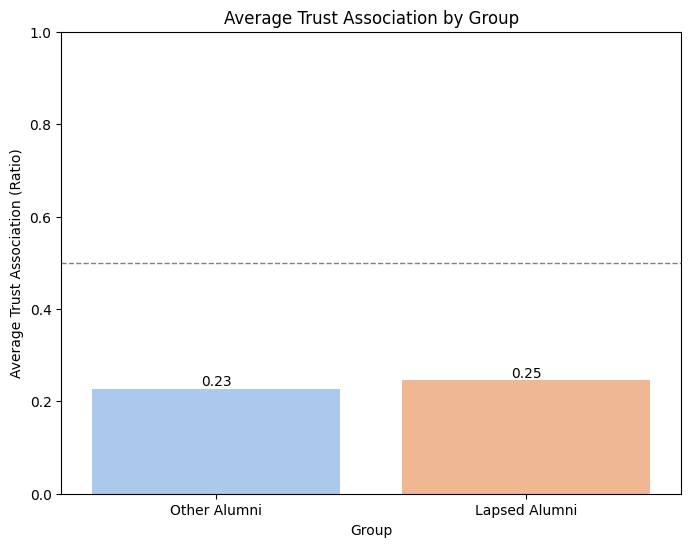

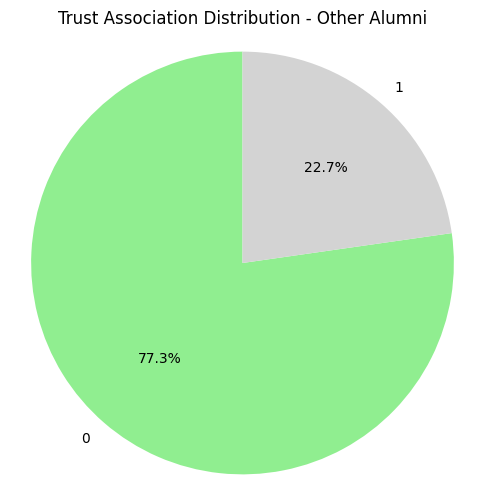

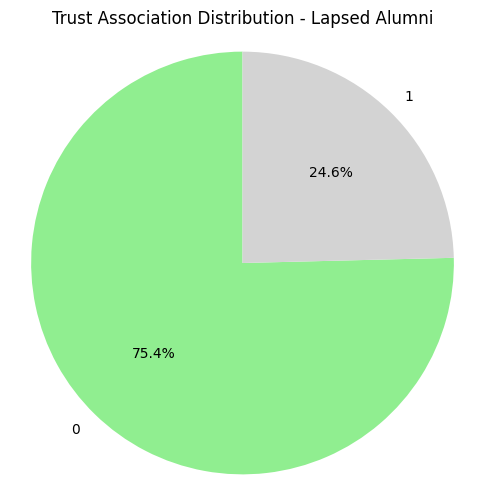

In [10]:
# Assuming the data has already been cleaned as per the previous code.

# Calculate the average 'Trust Association' for both groups
avg_trust_association = {
    'Group': ['Other Alumni', 'Lapsed Alumni'],
    'Average Trust Association': [
        sheet1_df['Trust Association'].mean(),
        sheet2_df['Trust Association'].mean()
    ]
}

avg_trust_df = pd.DataFrame(avg_trust_association)

# Plot the average 'Trust Association' values
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Group', y='Average Trust Association', data=avg_trust_df, palette='pastel')
plt.title('Average Trust Association by Group')
plt.ylabel('Average Trust Association (Ratio)')
plt.ylim(0, 1)

# Annotate the bar plot with the values
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

plt.axhline(0.5, linestyle='--', color='gray', linewidth=1)  # Add a reference line
plt.show()

# Create pie charts for 'Trust Association' in both groups
def plot_pie_chart(data, title):
    counts = data['Trust Association'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=['0', '1'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgray'])
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
    plt.show()

plot_pie_chart(sheet1_df, 'Trust Association Distribution - Other Alumni')
plot_pie_chart(sheet2_df, 'Trust Association Distribution - Lapsed Alumni')


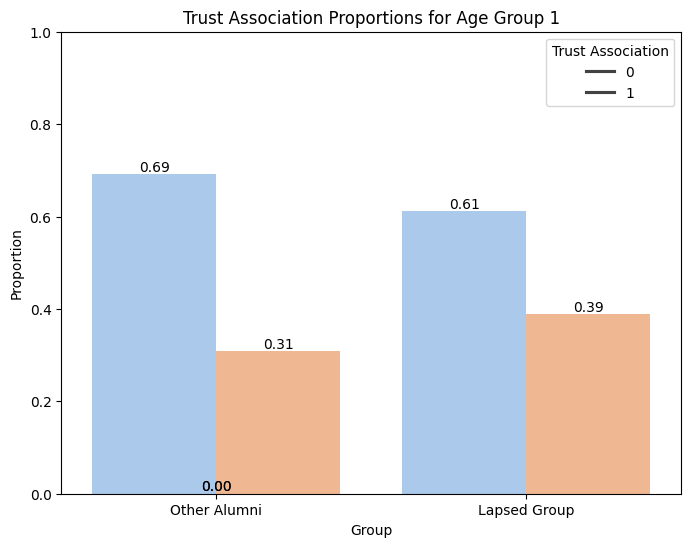

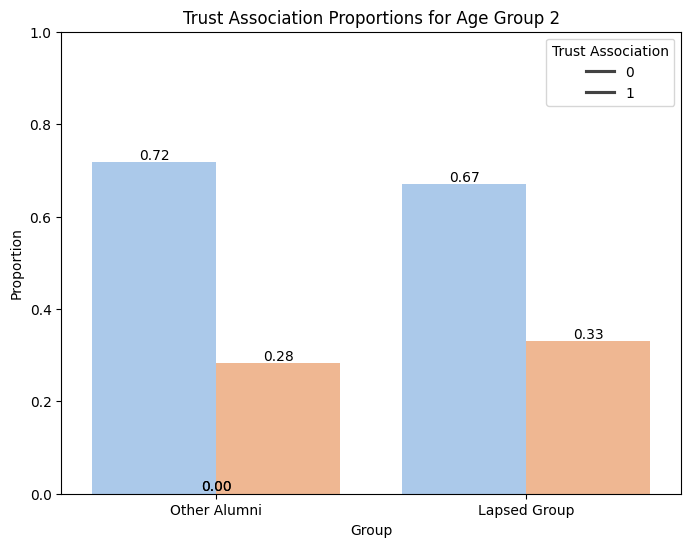

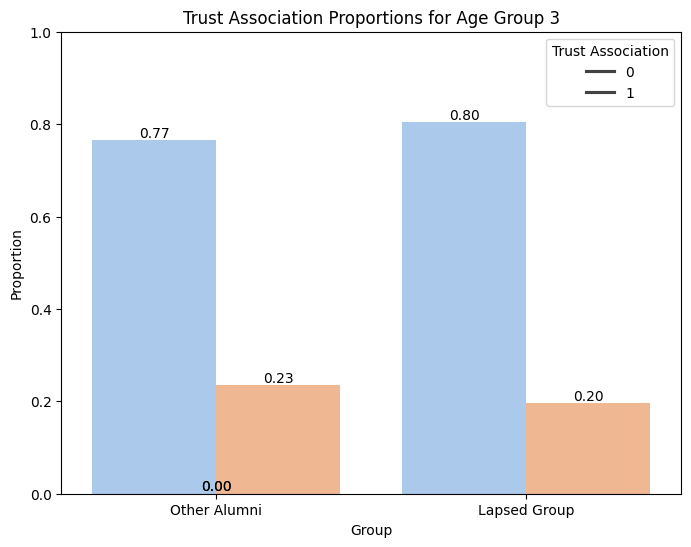

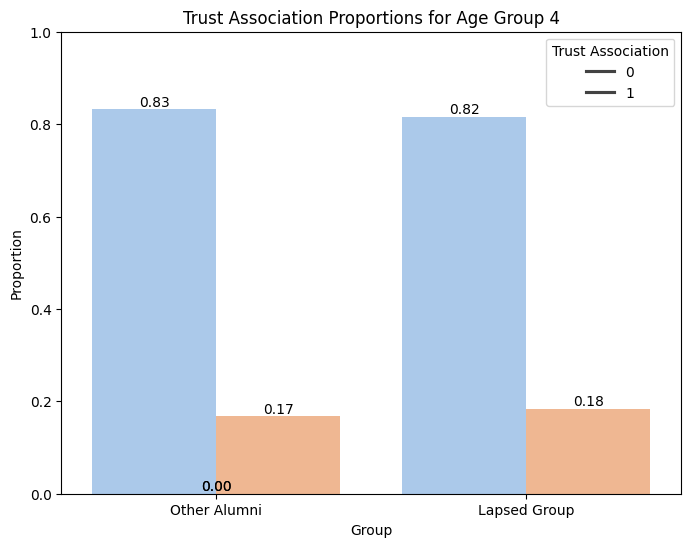

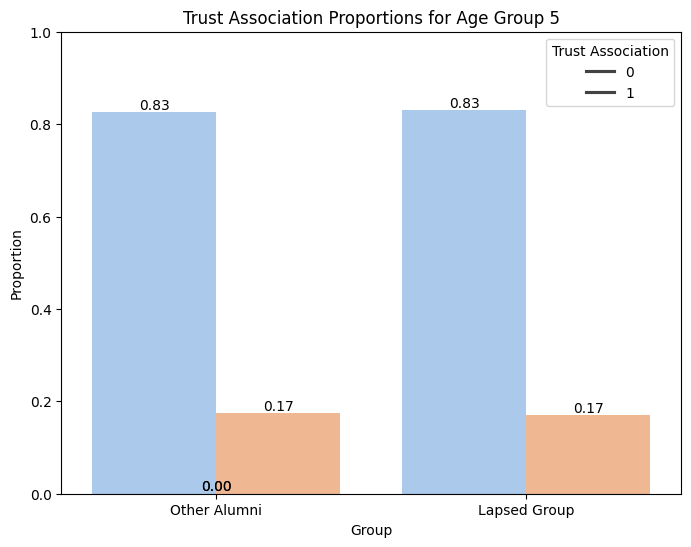

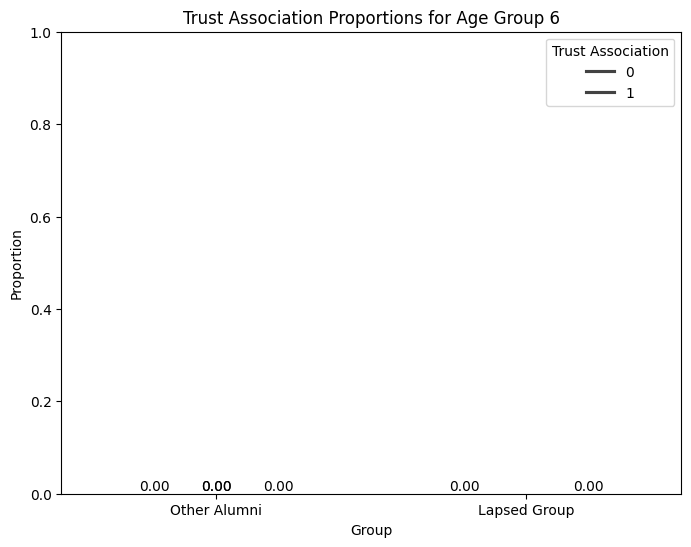

In [17]:
# Create a color palette for the plots
color_palette = sns.color_palette("pastel", 2)  # Two colors for lapsed and other alumni

# Loop through each age group (1 to 6)
for age_group in range(1, 7):
    # Filter the DataFrame for the current age group
    group_data_lapsed = sheet2_df[sheet2_df['Age Range Category'] == age_group]
    group_data_other = sheet1_df[sheet1_df['Age Range Category'] == age_group]

    # Calculate the proportions for lapsed group
    if not group_data_lapsed.empty:
        total_lapsed = group_data_lapsed['Trust Association'].count()
        proportion_lapsed_0 = (group_data_lapsed['Trust Association'] == 0).sum() / total_lapsed
        proportion_lapsed_1 = (group_data_lapsed['Trust Association'] == 1).sum() / total_lapsed
    else:
        proportion_lapsed_0, proportion_lapsed_1 = 0, 0  # No data case

    # Calculate the proportions for other alumni
    if not group_data_other.empty:
        total_other = group_data_other['Trust Association'].count()
        proportion_other_0 = (group_data_other['Trust Association'] == 0).sum() / total_other
        proportion_other_1 = (group_data_other['Trust Association'] == 1).sum() / total_other
    else:
        proportion_other_0, proportion_other_1 = 0, 0  # No data case

    # Prepare data for plotting
    proportions = {
        'Group': ['Other Alumni', 'Lapsed Group'],
        'Proportion 0': [proportion_other_0, proportion_lapsed_0],
        'Proportion 1': [proportion_other_1, proportion_lapsed_1],
    }

    proportions_df = pd.DataFrame(proportions)

    # Melt the DataFrame for plotting
    melted_df = proportions_df.melt(id_vars='Group', var_name='Trust Association', value_name='Proportion')

    # Create the bar plot for the current age group
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Group', y='Proportion', hue='Trust Association', data=melted_df, palette=color_palette)
    plt.title(f'Trust Association Proportions for Age Group {age_group}')
    plt.ylabel('Proportion')
    plt.ylim(0, 1)  # Set y-axis limits to show proportion

    # Annotate the bars with values
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

    plt.legend(title='Trust Association', labels=['0', '1'])
    plt.show()
